# ANOVA F Test

ANOVa (Analysis of Variance) é um teste estatístico que calcula a variância entre as médias de grupos de dados. A Ho (p-value alto) é de que os grupos tem a mesma variância e, portanto, não tem impacto para treinamento de modelo. Halt (p-value baixo) de que existe diferença significativa e o atributo é bom para treinamento de modelo.

In [3]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [4]:
#carregando o dataset
df = pd.read_csv('ml_project1_data.csv',sep=';',encoding='utf-8', low_memory=False, index_col = 0)

In [5]:
# Visualizando o dataset
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0


In [6]:
# Verificando dimensões
df.shape

(2240, 28)

In [7]:
# Removendo valores nulos
df.dropna(inplace=True)

In [8]:
# Cria cópia do dataset
df1 = df.copy()

In [9]:
# Transformando variáveis categóricas
cat = [var for var in df.columns if df[var].dtype=='object']
for col in cat:  
    print(f'A variável "{col}" possui {df[col].nunique()} valores únicos: {df[col].unique()}')


A variável "Education" possui 5 valores únicos: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
A variável "Marital_Status" possui 8 valores únicos: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
A variável "Dt_Customer" possui 662 valores únicos: ['04/09/2012' '08/03/2014' '21/08/2013' '10/02/2014' '19/01/2014'
 '09/09/2013' '13/11/2012' '08/05/2013' '06/06/2013' '13/03/2014'
 '15/11/2013' '10/10/2012' '24/11/2012' '24/12/2012' '31/08/2012'
 '28/03/2013' '03/11/2012' '08/08/2012' '06/01/2013' '23/12/2012'
 '11/01/2014' '18/03/2013' '02/01/2013' '27/05/2013' '31/05/2013'
 '22/11/2013' '22/05/2014' '11/05/2013' '29/10/2012' '20/02/2013'
 '29/08/2013' '31/12/2013' '02/09/2013' '11/02/2014' '01/02/2013'
 '29/04/2013' '12/03/2013' '02/10/2013' '28/06/2014' '09/11/2012'
 '24/05/2013' '08/11/2012' '12/05/2014' '11/08/2012' '07/06/2014'
 '12/06/2013' '19/11/2012' '02/04/2013' '28/04/2014' '03/03/2014'
 '04/07/2013' '07/09/2012' '18/02/2013' '11/06/2013' '06/12/201

In [10]:
#transformando os valore da variável em numéricos

df1['Education'] = df1.Education.map({'Graduation':1, 'PhD':2, 'Master':3, 'Basic':4, '2n Cycle':5})
df1['Marital_Status'] = df1.Marital_Status.map({'Single':1, 'Together':2, 'Married':3, 'Divorced':4, 'Widow':5, 'Alone':6, 'Absurd':7, 'YOLO':8})
df1['Dt_Customer'] = df1.Dt_Customer.map({'04/09/2012':1,'08/03/2014':2, '21/08/2013':3, '10/02/2014':4, '19/01/2014':5,
 '09/09/2013':6, '13/11/2012':7, '08/05/2013':8, '06/06/2013':9, '13/03/2014':10,
 '15/11/2013':11, '10/10/2012':12, '24/11/2012':12, '24/12/2012':13, '31/08/2012':14,
 '28/03/2013':15, '03/11/2012':16, '08/08/2012':17, '06/01/2013':18, '23/12/2012':19,
 '11/01/2014':20, '18/03/2013':21, '02/01/2013':22, '27/05/2013':23, '20/02/2013':24,
 '31/05/2013':25, '22/11/2013':26, '22/05/2014':27, '11/05/2013':28, '29/10/2012':29,
 '29/08/2013':30, '31/12/2013':31, '02/09/2013':32, '11/02/2014':33, '01/02/2013':34,
 '29/04/2013':35, '12/03/2013':36, '05/11/2013':37, '02/10/2013':38, '28/06/2014':39,
 '09/11/2012':40, '24/05/2013':41, '01/01/2014':42, '08/11/2012':43, '12/05/2014':44,
 '11/08/2012':45, '07/06/2014':46, '12/06/2013':47, '19/11/2012':48, '02/04/2013':49,
 '28/04/2014':50, '17/06/2013':51, '03/03/2014':52, '04/07/2013':53, '07/09/2012':54,
 '18/02/2013':55, '11/06/2013':56, '06/12/2013':57, '21/05/2013':58, '11/05/2014':59,
 '19/03/2014':60, '27/09/2013':61, '08/04/2013':62, '11/09/2012':63, '14/09/2012':64,
 '17/03/2013':65, '05/04/2013':66, '30/04/2014':67, '19/12/2012':68, '27/08/2012':69,
 '12/10/2012':70, '04/09/2013':71, '29/08/2012':72, '23/06/2013':73, '03/07/2013':74,
 '25/02/2014':75, '11/08/2013':76, '16/07/2013':77, '28/05/2014':78, '21/01/2014':79,
 '27/05/2014':80, '23/11/2013':81, '23/03/2014':82, '24/05/2014':83, '22/11/2012':84,
 '11/04/2013':85, '01/12/2013':86, '20/06/2013':87, '23/07/2013':88, '30/03/2014':89,
 '20/04/2013':90, '17/05/2013':91, '08/05/2014':92, '10/12/2013':93, '24/09/2013':94,
 '02/02/2013':95, '07/12/2012':96, '02/11/2013':97, '10/11/2012':98, '25/06/2014':99,
 '12/12/2012':100, '10/09/2013':101, '24/01/2014':102, '19/02/2013':103, '11/07/2013':104,
 '14/11/2013':105, '24/02/2014':106, '22/04/2013':107, '21/04/2013':108, '08/06/2014':109,
 '10/05/2014':110, '30/09/2013':111, '10/03/2013':112, '14/08/2013':113, '07/07/2013':114,
 '19/05/2014':115, '28/07/2013':116, '19/10/2012':117, '19/04/2013':118, '28/08/2013':119,
 '19/03/2013':120, '18/10/2012':121, '28/10/2012':122, '22/08/2012':123, '21/06/2014':124,
 '24/04/2014':125, '07/03/2014':126, '14/12/2012':127, '09/10/2012':128, '08/07/2013':129,
 '12/09/2013':130, '17/10/2013':131, '20/08/2013':132, '01/07/2013':133, '05/11/2012':134,
 '05/01/2014':135, '01/05/2013':136, '01/03/2014':137, '13/11/2013':138, '18/11/2013':139,
 '21/04/2014':140, '13/07/2013':141, '30/01/2014':142, '04/04/2014':143, '12/09/2012':144,
 '16/12/2012':145, '23/05/2014':146, '24/06/2014':147, '28/09/2013':148, '22/01/2014':149,
 '15/06/2014':150, '05/12/2012':151, '02/08/2013':152, '23/02/2013':153, '09/09/2012':154,
 '26/09/2013':155, '30/05/2013':156, '29/12/2013':157, '13/05/2014':158, '19/09/2013':159,
 '17/01/2013':160, '31/03/2014':161, '29/06/2014':162, '09/12/2013':163, '14/10/2013':164,
 '02/11/2012':165, '17/07/2013':166, '08/12/2013':167, '13/05/2013':168, '10/09/2012':169,
 '31/03/2013':170, '18/03/2014':171, '05/10/2012':172, '21/01/2013':173, '04/05/2013':174,
 '01/04/2014':175, '31/08/2013':176, '14/11/2012':177, '11/04/2014':178, '14/04/2014':179,
 '05/01/2013':180, '08/09/2012':181, '26/03/2013':182, '25/10/2012':183, '09/12/2012':184,
 '16/02/2014':185, '20/03/2013':186, '15/05/2013':187, '16/04/2014':188, '23/03/2013':189,
 '04/12/2013':190, '04/10/2013':191, '26/12/2013':192, '17/05/2014':193, '28/10/2013':194,
 '31/07/2013':195, '28/11/2013':196, '17/08/2012':197, '05/06/2014':198, '20/05/2013':199,
 '09/01/2013':200, '16/09/2013':201, '27/10/2013':202, '22/09/2012':203, '13/10/2012':204,
 '16/10/2012':205, '22/10/2012':206, '04/06/2013':207, '22/05/2013':208, '17/06/2014':209,
 '23/11/2012':210, '03/02/2013':211, '14/03/2013':212, '26/06/2014':213, '15/10/2012':214,
 '19/06/2013':215, '20/03/2014':216, '04/02/2014':217, '06/04/2014':218, '06/02/2013':219,
 '11/02/2013':220, '17/04/2014':221, '12/07/2013':222, '29/01/2013':223, '08/01/2013':224,
 '13/06/2013':225, '27/12/2013':226, '31/10/2012':227, '15/01/2014':228, '23/08/2012':229,
 '07/03/2013':230, '13/01/2013':231, '12/01/2013':232, '17/03/2014':233, '12/10/2013':234,
 '13/04/2014':235, '18/09/2012':236, '05/03/2014':237, '27/04/2013':238, '18/01/2014':239,
 '03/06/2013':240, '17/12/2013':241, '11/03/2014':242, '29/07/2013':243, '14/08/2012':244,
 '23/08/2013':245, '09/02/2014':246, '07/02/2013':247, '11/01/2013':248, '05/07/2013':249,
 '02/07/2013':250, '07/11/2013':251, '09/05/2013':252, '13/02/2013':253, '16/04/2013':254,
 '11/09/2013':255, '03/04/2013':256, '10/01/2013':257, '30/06/2013':258, '06/12/2012':259,
 '12/11/2012':260, '03/03/2013':261, '10/08/2012':262, '07/12/2013':263, '15/08/2013':264,
 '10/11/2013':265, '16/06/2014':266, '25/12/2012':267, '03/01/2014':268, '27/10/2012':269,
 '22/12/2012':270, '29/11/2013':271, '08/10/2013':272, '28/09/2012':273, '22/03/2014':274,
 '28/12/2012':275, '21/08/2012':276, '16/03/2013':277, '17/11/2012':278, '01/12/2012':279,
 '22/04/2014':280, '11/11/2012':281, '22/06/2013':282, '18/08/2012':283, '30/12/2012':284,
 '14/06/2013':285, '16/10/2013':286, '30/08/2012':287, '04/05/2014':288, '18/04/2013':289,
 '06/10/2013':290, '15/09/2012':291, '27/09/2012':292, '11/03/2013':293, '22/10/2013':294,
 '09/06/2014':295, '30/05/2014':296, '17/10/2012':297, '30/03/2013':298, '23/01/2013':299,
 '20/11/2013':300, '14/02/2014':301, '22/02/2013':302, '05/03/2013':303, '06/05/2014':304,
 '13/04/2013':305, '05/04/2014':306, '25/04/2013':307, '25/11/2013':308, '02/02/2014':309,
 '21/06/2013':310, '21/12/2013':311, '07/09/2013':312, '22/08/2013':313, '20/12/2013':314,
 '06/08/2013':315, '09/10/2013':316, '09/06/2013':317, '22/12/2013':318, '02/05/2013':319,
 '16/02/2013':320, '20/08/2012':321, '01/04/2013':322, '25/05/2014':323, '25/09/2012':324,
 '22/09/2013':325, '28/01/2014':326, '23/04/2013':327, '06/03/2014':328, '15/08/2012':329,
 '27/03/2013':330, '10/10/2013':331, '04/08/2012':332, '18/05/2014':333, '09/05/2014':334,
 '23/10/2012':335, '30/12/2013':336, '19/08/2012':337, '30/10/2013':338, '26/06/2013':339,
 '26/01/2014':340, '24/09/2012':341, '03/12/2012':342, '27/11/2013':343, '06/08/2012':344,
 '29/12/2012':345, '24/08/2012':346, '07/11/2012':347, '02/12/2013':348, '19/07/2013':349,
 '25/05/2013':350, '20/10/2013':351, '14/04/2013':352, '27/01/2014':353, '16/08/2013':354,
 '30/09/2012':355, '04/12/2012':356, '12/08/2012':357, '03/11/2013':358, '15/02/2013':359,
 '18/09/2013':360, '18/06/2014':361, '24/04/2013':362, '15/02/2014':363, '08/08/2013':364,
 '23/12/2013':365, '28/11/2012':366, '07/08/2013':367, '07/01/2014':368, '03/12/2013':369,
 '29/03/2014':370, '08/04/2014':371, '07/02/2014':372, '06/11/2013':373, '01/03/2013':374,
 '03/08/2013':375, '16/06/2013':376, '25/06/2013':377, '13/09/2013':378, '01/08/2013':379,
 '31/01/2013':380, '09/07/2013':381, '15/04/2013':382, '03/04/2014':383, '18/04/2014':384,
 '23/09/2012':385, '14/09/2013':386, '26/10/2012':387, '19/10/2013':388, '21/02/2013':389,
 '17/09/2013':390, '26/01/2013':391, '07/05/2014':392, '19/08/2013':393, '18/07/2013':394,
 '11/12/2012':395, '26/07/2013':396, '06/05/2013':397, '14/07/2013':398, '10/03/2014':399,
 '28/12/2013':400, '20/01/2013':401, '21/09/2012':402, '06/09/2012':403, '18/12/2012':404,
 '19/11/2013':405, '13/06/2014':406, '07/05/2013':407, '18/08/2013':408, '13/12/2013':409,
 '17/02/2014':410, '03/08/2012':411, '04/01/2014':412, '21/10/2013':413, '25/12/2013':414,
 '01/01/2013':415, '16/05/2013':416, '25/09/2013':417, '08/11/2013':418, '16/12/2013':419,
 '30/10/2012':420, '02/01/2014':421, '18/10/2013':422, '25/07/2013':423, '24/10/2013':424,
 '19/12/2013':425, '16/05/2014':426, '04/10/2012':427, '25/08/2013':428, '29/05/2013':429,
 '26/03/2014':430, '09/04/2014':431, '12/03/2014':432, '29/04/2014':433, '27/06/2014':434,
 '10/04/2013':435, '21/11/2013':436, '21/10/2012':437, '14/05/2013':438, '01/08/2012':439,
 '25/01/2014':440, '11/10/2013':441, '07/08/2012':442, '29/03/2013':443, '03/06/2014':444,
 '09/08/2012':445, '06/03/2013':446, '12/05/2013':447, '09/03/2014':448, '15/09/2013':449,
 '29/01/2014':450, '03/10/2013':451, '28/02/2013':452, '02/05/2014':453, '09/02/2013':454,
 '15/03/2013':455, '10/05/2013':456, '05/09/2012':457, '01/09/2013':458, '26/05/2013':459,
 '12/12/2013':460, '08/12/2012':461, '30/08/2013':462, '18/12/2013':463, '18/06/2013':464,
 '29/05/2014':465, '15/01/2013':466, '29/10/2013':467, '02/03/2013':468, '14/12/2013':469,
 '19/01/2013':470, '06/04/2013':471, '04/11/2013':472, '22/03/2013':473, '31/05/2014':474,
 '04/02/2013':475, '05/05/2013':476, '14/02/2013':477, '21/03/2014':478, '05/08/2013':479,
 '29/11/2012':480, '27/07/2013':481, '13/01/2014':482, '29/09/2012':483, '23/10/2013':484,
 '06/11/2012':485, '26/05/2014':486, '04/03/2014':487, '06/01/2014':488, '11/06/2014':489,
 '19/06/2014':490, '26/11/2012':491, '11/12/2013':492, '14/01/2014':493, '23/01/2014':494,
 '24/03/2013':495, '29/06/2013':496, '25/01/2013':497, '17/11/2013':498, '18/05/2013':499,
 '17/04/2013':500, '24/01/2013':501, '09/08/2013':502, '10/06/2013':503, '20/07/2013':504,
 '28/05/2013':505, '04/03/2013':506, '01/10/2012':507, '10/02/2013':508, '14/10/2012':509,
 '03/02/2014':510, '22/06/2014':511, '25/10/2013':512, '18/02/2014':513, '09/11/2013':514,
 '13/08/2013':515, '25/08/2012':516, '19/04/2014':517, '07/04/2014':518, '03/01/2013':519,
 '04/11/2012':520, '22/01/2013':521, '26/02/2014':522, '23/04/2014':523, '30/07/2013':524,
 '13/10/2013':525, '27/11/2012':526, '01/05/2014':527, '30/11/2012':528, '17/08/2013':529,
 '04/01/2013':530, '03/05/2014':531, '26/04/2014':532, '02/06/2014':533, '26/10/2013':534,
 '24/03/2014':535, '25/02/2013':536, '20/09/2013':537, '16/01/2013':538, '24/12/2013':539,
 '18/11/2012':540, '05/08/2012':541, '03/05/2013':542, '12/11/2013':543, '06/07/2013':544,
 '21/07/2013':545, '20/10/2012':546, '23/05/2013':547, '26/08/2012':548, '12/01/2014':549,
 '13/02/2014':550, '27/02/2014':551, '20/04/2014':552, '28/06/2013':553, '28/04/2013':554,
 '21/03/2013':555, '27/08/2013':556, '30/07/2012':557, '05/12/2013':558, '08/02/2013':559,
 '21/11/2012':560, '26/02/2013':561, '20/09/2012':562, '08/06/2013':563, '05/09/2013':564,
 '12/04/2014':565, '24/06/2013':566, '19/02/2014':567, '27/12/2012':568, '01/11/2012':569,
 '22/07/2013':570, '31/01/2014':571, '26/08/2013':572, '01/10/2013':573, '10/06/2014':574,
 '01/02/2014':575, '03/09/2012':576, '26/09/2012':577, '31/07/2012':578, '02/12/2012':579,
 '05/05/2014':580, '06/10/2012':581, '02/03/2014':582, '15/05/2014':583, '10/12/2012':584,
 '13/08/2012':585, '23/02/2014':586, '16/03/2014':587, '21/09/2013':588, '24/10/2012':589,
 '15/10/2013':590, '17/02/2013':591, '28/08/2012':592, '12/02/2014':593, '08/02/2014':594,
 '01/09/2012':595, '16/11/2012':596, '12/02/2013':597, '02/08/2012':598, '16/08/2012':599,
 '25/11/2012':600, '27/04/2014':601, '30/04/2013':602, '20/11/2012':603, '14/06/2014':604,
 '28/03/2014':605, '08/03/2013':606, '02/09/2012':607, '15/04/2014':608, '25/04/2014':609,
 '27/06/2013':610, '01/06/2013':611, '05/10/2013':612, '22/02/2014':613, '12/04/2013':614,
 '23/09/2013':615, '24/07/2013':616, '23/06/2014':617, '10/01/2014':618, '25/03/2013':619,
 '17/01/2014':620, '04/06/2014':621, '25/03/2014':622, '31/12/2012':623, '19/09/2012':624,
 '27/02/2013':625, '02/10/2012':626, '09/04/2013':627, '02/04/2014':628, '07/01/2013':629,
 '26/11/2013':630, '04/08/2013':631, '17/12/2012':632, '06/06/2014':633, '19/05/2013':634,
 '12/08/2013':635, '15/12/2013':636, '07/10/2012':637, '06/09/2013':638, '15/07/2013':639,
 '27/01/2013':640, '05/02/2014':641, '26/12/2012':642, '06/02/2014':643, '14/01/2013':644,
 '20/06/2014':645, '24/08/2013':646, '28/02/2014':647, '07/04/2013':648, '10/04/2014':649,
 '12/06/2014':650, '30/11/2013':651, '09/03/2013':652, '27/03/2014':653, '15/12/2012':654,
 '17/09/2012':655, '02/06/2013':656, '21/12/2012':657, '01/11/2013':658, '10/08/2013':659,
 '11/10/2012':660, '20/12/2012':661, '09/01/2014':662})

In [10]:
df1.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,1,1,58138.0,0,0,1,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,1,1,46344.0,1,1,2,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,1,2,71613.0,0,0,3,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,1,2,26646.0,1,0,4,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,2,3,58293.0,1,0,5,94,173,43,...,5,0,0,0,0,0,0,3,11,0
7446,1967,3,2,62513.0,0,1,6,16,520,42,...,6,0,0,0,0,0,0,3,11,0
965,1971,1,4,55635.0,0,1,7,34,235,65,...,6,0,0,0,0,0,0,3,11,0
6177,1985,2,3,33454.0,1,0,8,32,76,10,...,8,0,0,0,0,0,0,3,11,0
4855,1974,2,2,30351.0,1,0,9,19,14,0,...,9,0,0,0,0,0,0,3,11,1


In [1]:
# Importando library
import pingouin as pg

In [35]:
# Calculando a estatística com ANOVA
aov = []
for variance in df1.columns[2:20]:
  v = pg.anova(data=df1, dv='Education', between=variance, detailed=True).round(9)
  aov.append(v)

In [36]:
pd.concat(aov)

,Source,SS,DF,MS,F,p-unc,np2
0,Marital_Status,2.315802,7,0.330829,0.209073,0.983507,0.000662
1,Within,3493.849812,2208,1.582360,NaN,NaN,NaN
0,Income,3419.165614,1973,1.732978,5.446502,0.000000,0.977976
1,Within,77.000000,242,0.318182,NaN,NaN,NaN
0,Kidhome,5.839000,2,2.919500,1.851074,0.157311,0.001670
1,Within,3490.326614,2213,1.577192,NaN,NaN,NaN
0,Teenhome,8.868298,2,4.434149,2.813861,0.060188,0.002537
1,Within,3487.297316,2213,1.575823,NaN,NaN,NaN
0,Dt_Customer,1164.160022,660,1.763879,1.176169,0.006138,0.332982
1,Within,2332.005592,1555,1.499682,NaN,NaN,NaN


In [37]:
data = pd.concat(aov)
data = data[data.Source!='Within'][['Source','F']]
data

,Source,F
0,Marital_Status,0.209073
0,Income,5.446502
0,Kidhome,1.851074
0,Teenhome,2.813861
0,Dt_Customer,1.176169
0,Recency,1.079874
0,MntWines,0.949161
0,MntFruits,1.139985
0,MntMeatProducts,1.028787
0,MntFishProducts,1.398363


C:\Users\Micro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


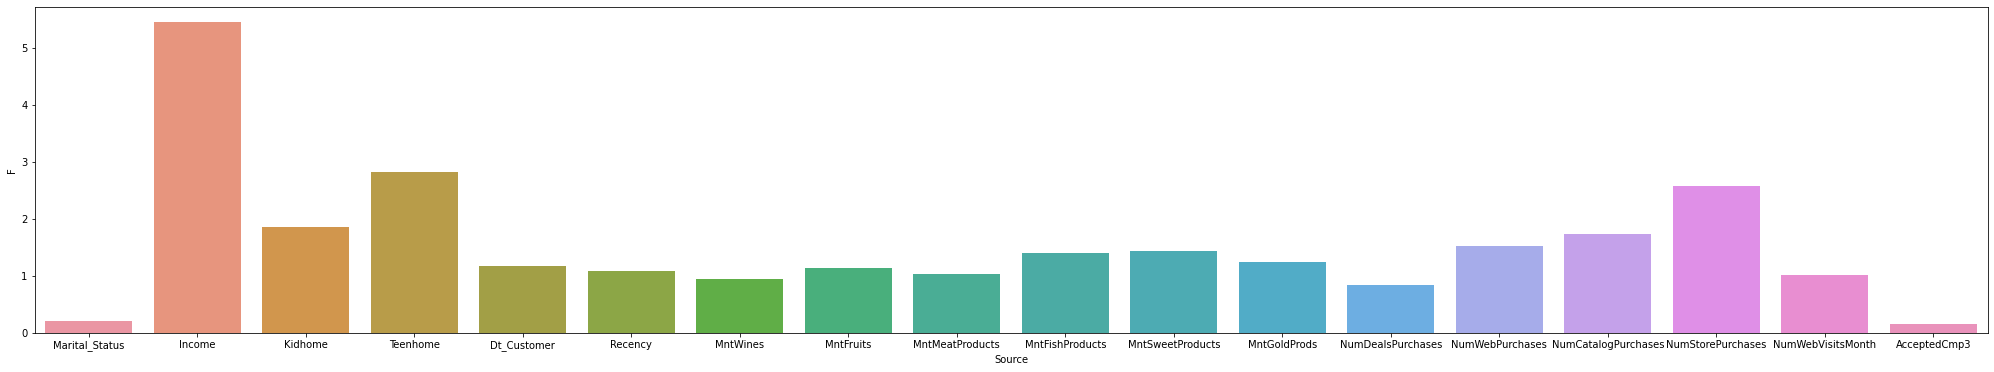

In [41]:
plt.figure(figsize=(35,6))
sns.barplot('Source', 'F', data=data)
plt.show()

Verificando o resultado das análises de variância, chegamos ao resultado: As variáveis mais relevantes para construção de um modelo seriam "Income", "Teenhome", "NumStorePurchsases", "NumCatalogPurchases" e "Kidhome", sendo as suas compras e seu status de casamento menos relevantes para descobrir seu nível de escolaridade.